In [1]:
!pip install lalsuite pycbc

    100% |████████████████████████████████| 20.8MB 45kB/s eta 0:00:011
    100% |████████████████████████████████| 3.0MB 3.0MB/s eta 0:00:01
    100% |████████████████████████████████| 573kB 4.3MB/s ta 0:00:011
    100% |████████████████████████████████| 573kB 5.8MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 5.1MB/s a 0:00:011
    100% |████████████████████████████████| 6.1MB 391kB/s ta 0:00:011
    100% |████████████████████████████████| 798kB 4.6MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 8.1MB/s eta 0:00:01
    100% |████████████████████████████████| 2.5MB 4.0MB/s eta 0:00:01


  Running setup.py bdist_wheel for pycbc ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/3e/da/17/8dbbf1133b9daa760e7f5d22e9693ec00ad1fdc1a2e117c835
  Running setup.py bdist_wheel for Mako ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/15/35/25/dbcb848832ccb1a4b4ad23f529badfd3bce9bf88017f7ca510
  Running setup.py bdist_wheel for weave ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/8b/b7/53/287a0ab1034dd211f826411dd59f41de1b5ba00aec8cf6e4c7
  Running setup.py bdist_wheel for mpld3 ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Running setup.py bdist_wheel for pyRXP ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/ff/71/94/db97dc250e9935c590f96650cd4b8c4411c82086f0fa5828ac
  Running setup.py bdist_wheel for lscsoft-glue ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/e7/3c/18/9712983fce758218947efe2bec1f2cf6cec3bb0af085116403
  Running 

In [15]:
import numpy as np
import json

In [3]:
!curl -O http://chrisnorth.github.io/plotgw/json/events.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16687  100 16687    0     0  16687      0  0:00:01 --:--:--  0:00:01 71311


In [7]:
filein=json.load(open('events.json'))

In [50]:
datain=filein['data']
wfs={}
for d in datain:
    wfs[d]={}
    if 'best' in datain[d]['M1']:
        wfs[d]["M1"]=datain[d]['M1']['best']
    elif 'lim' in datain[d]['M1']:
        lims=datain[d]['M1']['lim']
        wfs[d]['M1']=0.5*(lims[0]+lims[1])
    if 'best' in datain[d]['M2']:
        wfs[d]["M2"]=datain[d]['M2']['best']
    elif 'lim' in datain[d]['M2']:
        lims=datain[d]['M2']['lim']
        wfs[d]['M2']=0.5*(lims[0]+lims[1])
    if 'best' in datain[d]['DL']:
        wfs[d]["DL"]=datain[d]['DL']['best']
    

In [55]:
wfs

{u'GW150914': {'DL': 420, 'M1': 36.2, 'M2': 29.1},
 u'GW151226': {'DL': 440, 'M1': 14.2, 'M2': 7.5},
 u'GW170104': {'DL': 880, 'M1': 31.2, 'M2': 19.4},
 u'GW170608': {'DL': 340, 'M1': 12, 'M2': 7},
 u'GW170814': {'DL': 540, 'M1': 30.5, 'M2': 25.3},
 u'GW170817': {'DL': 40, 'M1': 1.48, 'M2': 1.2650000000000001},
 u'LVT151012': {'DL': 1000, 'M1': 23, 'M2': 13}}

In [120]:
from pycbc.waveform import get_td_waveform
from astropy.table import Table
for d in wfs:
    print('processing {}: {} + {} ({} MPc)'.format(d,wfs[d]['M1'],wfs[d]['M2'],wfs[d]['DL']))
    m1=wfs[d]['M1']
    m2=wfs[d]['M2']
#     if m1 > 5 and m2 > 5:
#         tres=1.0/4096
#     else:
#         tres=1.0
#     if tres < 1.0:
    hp,hc = get_td_waveform(approximant="SEOBNRv3_opt_rk4",
                     mass1=wfs[d]['M1'],
                     mass2=wfs[d]['M2'],
                     delta_t=1.0/4096,
                     f_lower=30,
                     distance=wfs[d]['DL'])
    t= hp.sample_times
    wfs[d]['data']=Table({'t':t,'hp':hp,'hc':hc})
# d2="GW151226"
# hp2, hc2 = get_td_waveform(approximant="SEOBNRv4_opt",
#                          mass1=wfs[d2]['M1'],
#                          mass2=wfs[d2]['M2'],
#                          delta_t=1.0/4096,
#                          f_lower=30)

processing LVT151012: 23 + 13 (1000 MPc)
processing GW170608: 12 + 7 (340 MPc)
processing GW150914: 36.2 + 29.1 (420 MPc)
processing GW170814: 30.5 + 25.3 (540 MPc)
processing GW170817: 1.48 + 1.265 (40 MPc)
processing GW170104: 31.2 + 19.4 (880 MPc)
processing GW151226: 14.2 + 7.5 (440 MPc)


In [45]:
help(get_td_waveform)

Help on function get_td_waveform in module pycbc.waveform.waveform:

get_td_waveform(template=None, **kwargs)
    Return the plus and cross polarizations of a time domain waveform.
    
    Parameters
    ----------
    template: object
        An object that has attached properties. This can be used to subsitute
        for keyword arguments. A common example would be a row in an xml table.
    mass1 : {None, float}
        The mass of the first component object in the binary (in solar masses).
    mass2 : {None, float}
        The mass of the second component object in the binary (in solar masses).
    spin1x : {0.0, float}
        The x component of the first binary component's dimensionless spin.
    spin1y : {0.0, float}
        The y component of the first binary component's dimensionless spin.
    spin1z : {0.0, float}
        The z component of the first binary component's dimensionless spin.
    spin2x : {0.0, float}
        The x component of the second binary component's dim

In [47]:
import matplotlib.pyplot as plot

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


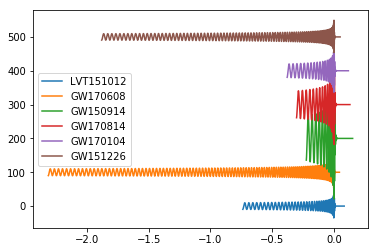

In [121]:
i=0
for d in wfs:
    if 'hp' in wfs[d]:
        plot.plot(wfs[d]['data']['t'],i*200+wfs[d]['data']['hp']*1e23,label=d)
        i+=1
plot.legend()

In [73]:
for d in wfs:
    if 'data' in wfs[d]:
        wfs[d]['data'].write('waveform_{}.csv'.format(d),format='ascii.csv',overwrite=True)

In [123]:
for d in wfs:
    if 'data' in wfs[d]:
        hp=wfs[d]['data']['hp']
        t=wfs[d]['data']['t']
        hp2=np.where(np.abs(hp)<1e-24,0,hp*1e23)
        wfs[d]['data2']=Table([t,hp2],names=['t','strain*1e23'])
        for l in range(len(wfs[d]['data2'])):
            wfs[d]['data2'][l]['t']=round(wfs[d]['data2'][l]['t'],5)
            wfs[d]['data2'][l]['strain*1e23']=round(wfs[d]['data2'][l]['strain*1e23'],1)
#         wfs[d]['data2'].write('reduced/waveform_{}_reduced.csv'.format(d),format='ascii.csv',overwrite=True)
        wfs[d]['data2'].write('compressed/waveform_{}_compress.txt'.format(d),format='ascii.basic',delimiter=" ",overwrite=True)

(-0.01, 0)

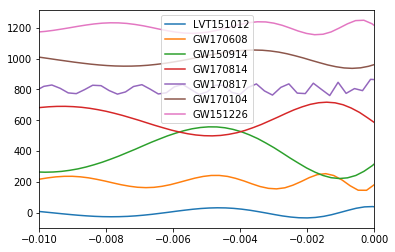

In [129]:
i=0
for d in wfs:
#     if 'hp' in wfs[d] and d!="GW170817":
        plot.plot(wfs[d]['data2']['t'],i*200+wfs[d]['data2']['strain*1e23'],label=d)
        i+=1
plot.legend()
plot.xlim(-0.01,0)

In [99]:
wfs[d]['data2']

t,hp
float64,float64
-1.8793,-9.4
-1.87906,-9.3
-1.87881,-9.2
-1.87857,-9.1
-1.87832,-9.0
-1.87808,-8.8
-1.87784,-8.6
-1.87759,-8.5
-1.87735,-8.3


In [81]:
round(5.46,1)

5.5

In [107]:
!mkdir compressed

In [119]:
hp,hc = get_td_waveform(approximant="SEOBNRv3_opt_rk4",
                         mass1=1.48,
                         mass2=1.265,
                         delta_t=1./4096,
                         f_lower=30,
                         distance=40.)

In [112]:
from pycbc.waveform import td_approximants, fd_approximants
td_approximants()

['TaylorF2',
 'TaylorEt',
 'SEOBNRv3_opt',
 'IMRPhenomA',
 'IMRPhenomC',
 'IMRPhenomB',
 'EOBNRv2',
 'NRSur7dq2',
 'SEOBNRv2_ROM_DoubleSpin',
 'SEOBNRv2_ROM_EffectiveSpin',
 'SpinTaylorF2',
 'SpinTaylorF2_SWAPPER',
 'SEOBNRv2_ROM_DoubleSpin_HI',
 'EOBNRv2_ROM',
 'SEOBNRv1_ROM_EffectiveSpin',
 'SEOBNRv1_ROM_DoubleSpin',
 'SEOBNRv4_opt',
 'TaylorF2NL',
 'PhenSpinTaylor',
 'PhenSpinTaylorRD',
 'NR_hdf5',
 'TEOBResum_ROM',
 'SEOBNRv4_ROM',
 'SEOBNRv3_pert',
 'EOBNRv2HM',
 'SpinTaylorT4',
 'TaylorT1',
 'EOBNRv2HM_ROM',
 'TaylorT3',
 'TaylorT2',
 'HGimri',
 'TaylorT4',
 'IMRPhenomD',
 'IMRPhenomPv2',
 'SEOBNRv4T',
 'SEOBNRv2T',
 'SEOBNRv1',
 'SpinDominatedWf',
 'SEOBNRv3',
 'SEOBNRv2',
 'SpinTaylorT1',
 'SEOBNRv4',
 'SpinTaylorT2',
 'EccentricTD',
 'SEOBNRv2_opt',
 'SEOBNRv3_opt_rk4']